## Overview

13,580 observations showing homes for sale in Melbourn. They are posted from '2016-03-12' to '2017-09-23'.

My goal is to provide real estate data query function in any area in Melbourne, Overview house market data, and evaluation of factors and weights that affect house prices.

#### Query the summary of the real estate data in the selected area:
1.1 Number of houses sold (2016 VS 2017)
1.2 Mainstream room types
1.3 Best Sellers (2016 VS 2017)
1.4 Annual average price of different house types
1.5 Yearly price per square meter of construction area and price per square meter of land area for different housing types

#### Analysis and summary of the overall market:
2.1 Regional average price ranking
2.2 Ranking of average price of regional construction area
2.3 Ranking of average price of regional land area
2.4 Best Sellers

#### Factors affecting house prices;
3.1 The relationship between housing prices and regions
3.2 Changes in house prices over time
3.3 The relationship between housing prices and the number of toilets
3.4 The relationship between house price and building area and land area


In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# defaut setting
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

### Overview Dataset

In [3]:
df_melb = pd.read_csv('melb_data.csv')

In [4]:
df_melb.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [5]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df_melb.isnull().sum().sort_values(ascending = False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [7]:
df_melb.describe(include = 'object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [8]:
df_melb.duplicated().sum()

0

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------
#### Total records: 13,580
#### Null value:  6450 NA in 'BuildingArea'; 5375 NA in 'YearBuilt'; 1369 NA in 'CouncilArea'; 62 NA in 'Car'
 

In [9]:
# Choose 'Reservoir' 
df_Reservoir = df_melb[df_melb['Suburb'] == 'Reservoir'] 

In [10]:
# Split year
df_Reservoir['Year'] = df_Reservoir['Date'].apply(lambda x: x[-4:])

In [11]:
# house sale numbers in 2016 and 2017
df_2016 = df_Reservoir.loc[df_Reservoir['Year'] == '2016']
df_2017 = df_Reservoir.loc[df_Reservoir['Year'] == '2017']
df_2016_count = df_2016['Type'].value_counts()
df_2017_count = df_2017['Type'].value_counts()
df_2016_total = df_2016['Type'].count()
df_2017_total = df_2017['Type'].count()
labels  =['House','Unit','Townhouse']

In [12]:
# just backup
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0.5, 1.0, '160 Houses on Sale in 2017')

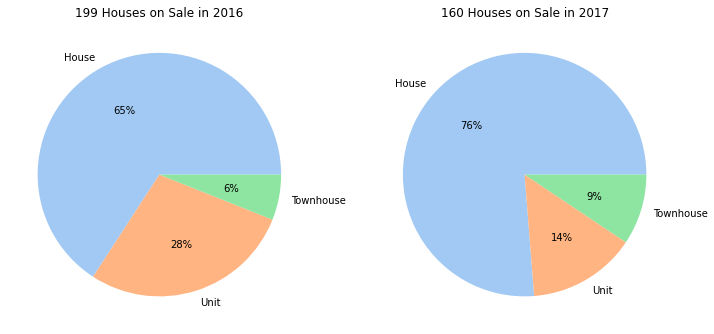

In [14]:
# Plot number of House on Sale in two years.

colors = sns.color_palette('pastel')[0:3]
f = plt.figure(figsize = (12,6))
f1 = f.add_subplot(1,2,1)
plt.pie(df_2016_count, labels = labels, colors = colors, autopct= "%d%%")
plt.title('%d Houses on Sale in 2016' %df_2016_total)


f2 = f.add_subplot(1,2,2)
plt.pie(df_2017_count, labels = labels, colors = colors, autopct= "%d%%")
plt.title('%d Houses on Sale in 2017' %df_2017_total)


Text(0.5, 1.0, 'Best Seller in 2017')

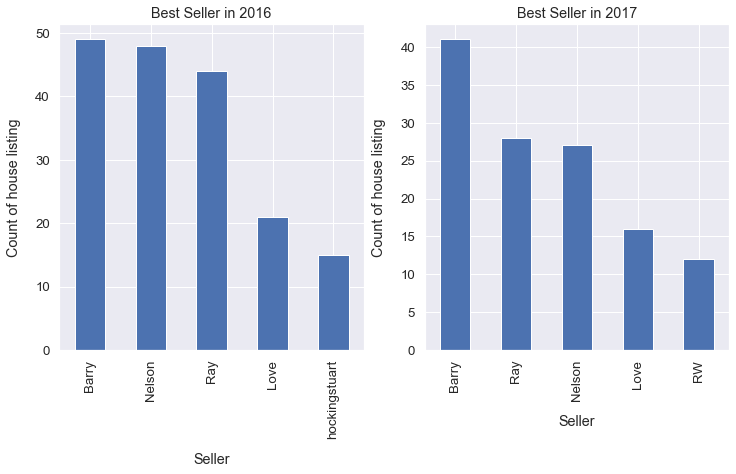

In [15]:
# Plot top 5 sellers
sns.set(font_scale=1.2)


f = plt.figure(figsize = (12,6))
f1 = f.add_subplot(1,2,1)
df_2016['SellerG'].value_counts()[:5].plot(kind = 'bar')
plt.xlabel("Seller", labelpad=14)
plt.ylabel("Count of house listing", labelpad=14)
plt.title("Best Seller in 2016")



f2 = f.add_subplot(1,2,2)
df_2017['SellerG'].value_counts()[:5].plot(kind = 'bar')
plt.xlabel("Seller", labelpad=14)
plt.ylabel("Count of house listing", labelpad=14)
plt.title("Best Seller in 2017")


In [16]:
# Set rooms,bedrooms and bathrooms as house feature
df_house = df_Reservoir[df_Reservoir['Type'] == 'h']
df_house_feature = pd.melt(df_house, value_vars = ['Rooms','Bedroom2','Bathroom'],var_name = 'House_feature',value_name = 'Value')
df_house_feature

,House_feature,Value
0,Rooms,3.0
1,Rooms,3.0
2,Rooms,3.0
3,Rooms,3.0
4,Rooms,3.0
...,...,...
754,Bathroom,1.0
755,Bathroom,1.0
756,Bathroom,2.0
757,Bathroom,3.0


In [17]:
# The average house price
df_Price_mean = df_Reservoir.groupby(['Type','Year'])['Price'].mean().reset_index()
df_Price_mean

,Type,Year,Price
0,h,2016,748000.000000
1,h,2017,827505.737705
2,t,2016,507208.333333
3,t,2017,625833.333333
4,u,2016,396589.285714
5,u,2017,482021.739130


[Text(0.5, 1.0, 'The Average House Price')]

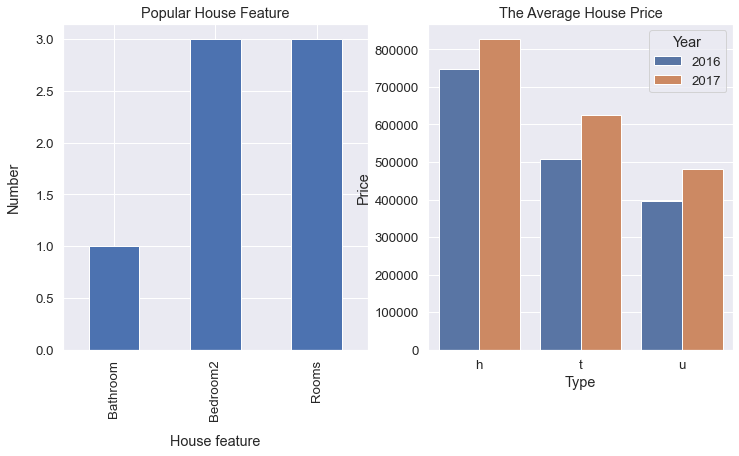

In [18]:
# Plot Popular house features and Average House price
sns.set(font_scale=1.2)
f = plt.figure(figsize = (12,6))

f1 = f.add_subplot(1,2,1)
df_house_feature.groupby('House_feature')['Value'].agg(pd.Series.mode).plot(kind = 'bar')
plt.xlabel("House feature", labelpad=14)
plt.ylabel("Number",labelpad=14)
plt.title("Popular House Feature")


f2 = f.add_subplot(1,2,2)
sns.barplot(x = 'Type',y = 'Price',hue = 'Year',data =df_Price_mean).set(title = 'The Average House Price')


In [19]:
# fill in NA in BuildingArea by mean
# fill in o in Landsize by mean
BuildingArea_mean = df_Reservoir['BuildingArea'].mean()
Landsize_mean = df_Reservoir['Landsize'].mean()
df_Reservoir['BuildingArea'].fillna(BuildingArea_mean)
df_Reservoir['Landsize'].replace(0,Landsize_mean)

5029      191.0
5030      189.0
5031      779.0
5032      117.0
5033      535.0
          ...  
13526     224.0
13527    1002.0
13528     527.0
13529     585.0
13530     343.0
Name: Landsize, Length: 359, dtype: float64

In [20]:
# add Column P/L and P/B, fill the Price per square meter of Construction Area and Price per square meter of Building Area.
df_Reservoir['P/L'] = df_Reservoir['Price'] / df_Reservoir['Landsize']
df_Reservoir['P/B'] = df_Reservoir['Price'] / df_Reservoir['BuildingArea']
df_Reservoir.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,P/L,P/B
5029,Reservoir,1/21 Dumbarton St,3,u,475000.0,S,Ray,3/09/2016,11.2,3073.0,3.0,1.0,1.0,191.0,107.0,1990.0,Darebin,-37.7019,145.0256,Northern Metropolitan,21650.0,2016,2486.910995,4439.252336
5030,Reservoir,1/147 Purinuan Rd,2,u,415000.0,PI,Ray,3/09/2016,11.2,3073.0,2.0,1.0,1.0,189.0,84.0,2012.0,Darebin,-37.7080,145.0181,Northern Metropolitan,21650.0,2016,2195.767196,4940.476190
5031,Reservoir,30 Ashton St,3,h,731000.0,S,Barry,3/12/2016,11.2,3073.0,3.0,1.0,2.0,779.0,138.0,1950.0,Darebin,-37.7292,145.0214,Northern Metropolitan,21650.0,2016,938.382542,5297.101449
5032,Reservoir,2/20 Crookston Rd,2,u,352000.0,SP,Barry,3/12/2016,11.2,3073.0,2.0,1.0,1.0,117.0,62.0,2012.0,Darebin,-37.7101,145.0223,Northern Metropolitan,21650.0,2016,3008.547009,5677.419355
5033,Reservoir,19 Drysdale St,3,h,723000.0,S,Ray,3/12/2016,11.2,3073.0,3.0,1.0,1.0,535.0,86.0,1950.0,Darebin,-37.7299,145.0242,Northern Metropolitan,21650.0,2016,1351.401869,8406.976744


In [21]:
df_price_h = df_Reservoir[df_Reservoir['Type'] == 'h']
df_price_h = pd.melt(df_price_h, id_vars = 'Year',value_vars = ['P/L','P/B'],var_name = 'Unit',value_name = 'Price')
df_price_h

,Year,Unit,Price
0,2016,P/L,938.382542
1,2016,P/L,1351.401869
2,2016,P/L,542.789223
3,2016,P/L,813.648294
4,2016,P/L,1516.272189
...,...,...,...
501,2017,P/B,NaN
502,2017,P/B,12173.913043
503,2017,P/B,6541.176471
504,2017,P/B,3550.000000


In [22]:
df_price_t = df_Reservoir[df_Reservoir['Type'] == 't']
df_price_t = pd.melt(df_price_t, id_vars = 'Year',value_vars = ['P/L','P/B'],var_name = 'Unit',value_name = 'Price')
df_price_t

,Year,Unit,Price
0,2016,P/L,2.995169e+03
1,2017,P/L,5.384615e+03
2,2016,P/L,3.927215e+03
3,2016,P/L,2.314410e+03
4,2016,P/L,2.192593e+03
5,2016,P/L,2.616352e+03
6,2017,P/L,inf
7,2017,P/L,2.947826e+03
8,2016,P/L,4.578313e+03
9,2016,P/L,5.156250e+03


In [23]:
df_price_u = df_Reservoir[df_Reservoir['Type'] == 'u']
df_price_u = pd.melt(df_price_u, id_vars = 'Year',value_vars = ['P/L','P/B'],var_name = 'Unit',value_name = 'Price')
df_price_u

,Year,Unit,Price
0,2016,P/L,2.486911e+03
1,2016,P/L,2.195767e+03
2,2016,P/L,3.008547e+03
3,2016,P/L,3.393939e+03
4,2017,P/L,2.303571e+03
5,2016,P/L,2.368421e+03
6,2016,P/L,2.771318e+03
7,2016,P/L,2.928082e+03
8,2016,P/L,2.277778e+03
9,2016,P/L,4.736842e+03


[Text(0.5, 1.0, 'Average House Price by Landsize/Building Area')]

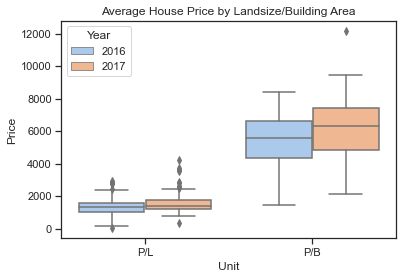

In [24]:
# Plot
sns.set_theme(style="ticks", palette="pastel")
f1 = f.add_subplot(1,3,1)
sns.boxplot(x='Unit',y='Price',hue = 'Year',data = df_price_h).set(title = 'Average House Price by Landsize/Building Area')

#f2 = f.add_subplot(1,3,2)
#sns.boxplot(x='Unit',y='Price',hue = 'Year',data = df_price_u).set(title = 'Average Unit Price by Landsize/Building Area')

#f3 = f.add_subplot(1,3,1)
#sns.boxplot(x='Unit',y='Price',hue = 'Year',data = df_price_t).set(title = 'Average Townhouse Price by Landsize/Building Area')
